## Logistic Regression using `Optim.jl`

In [12]:
using Pkg
Pkg.activate(".")
using CSV
using DataFrames
using PyPlot
using Optim

  Activating project at `~/Documents/CODE/ACN6348-lab`


## Loading the dataset

In [13]:
path = joinpath(pwd(),"data","spam.csv")
spam = CSV.read(path,DataFrame)
first(spam,4) # show only first four rows

,crl.tot,dollar,bang,money,n000,make,yesno
,Int64,Float64,Float64,Float64,Float64,Float64,String1
1,278,0.0,0.778,0.0,0.0,0.0,y
2,1028,0.18,0.372,0.43,0.43,0.21,y
3,2259,0.184,0.276,0.06,1.16,0.06,y
4,191,0.0,0.137,0.0,0.0,0.0,y


In [14]:
spam.crlnormalized = spam[:,"crl.tot"] ./ maximum(spam[:,"crl.tot"])
select!(spam, Not("crl.tot"));
first(spam,4)

,dollar,bang,money,n000,make,yesno,crlnormalized
,Float64,Float64,Float64,Float64,Float64,String1,Float64
1,0.0,0.778,0.0,0.0,0.0,y,0.0175494
2,0.18,0.372,0.43,0.43,0.21,y,0.0648949
3,0.184,0.276,0.06,1.16,0.06,y,0.142605
4,0.0,0.137,0.0,0.0,0.0,y,0.0120573


## Extracting input patterns and targets

In [15]:
S = select(spam, Not(:yesno)) |> Matrix
y = spam.yesno .== "y";

In [16]:
sigmoid(x) = (1 + exp(-x)).^-1

sigmoid (generic function with 1 method)

In [17]:
SS = [ones(size(S,1)) S];

## Empirical Risk Function

In [18]:
function erf(θ)
    n = length(y)
    ydotdot = sigmoid.(SS*θ)
    sum(1/n*(-y .* log.(ydotdot)) .- ((1 .- y) .* log.(1 .- ydotdot)))
end

erf (generic function with 1 method)

In [19]:
initialtheta = zeros(size(SS,2),1);

## Running Gradient Descent 

In [20]:
res = optimize(erf,initialtheta, GradientDescent(), Optim.Options(store_trace=true))

 * Status: success

 * Candidate solution
    Final objective value:     2.989091e+01

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 3.55e-15 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.12e-17 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 3.93e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   4  (vs limit Inf)
    Iterations:    8
    f(x) calls:    375
    ∇f(x) calls:   375


## Extracting Learned Parameters

In [21]:
thetas = Optim.minimizer(res)

7×1 Matrix{Float64}:
 -69.39636024488078
  11.846484846278377
  -5.664031241085754
 -48.37289380323021
  18.076223972800747
   1.5354880866056873
   0.8727543693408615

## Visualizing the `gradnorm`

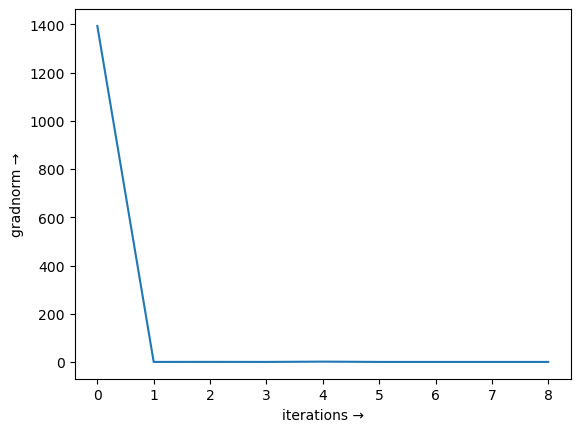

In [22]:
figure()
plot(Optim.g_norm_trace(res))
xlabel("iterations →")
ylabel("gradnorm →");